In [4]:
!pip install -U gensim
!pip install nltk
!pip install pandas
!pip install -U scikit-learn scipy matplotlib
!pip install seaborn

     |████████████████████████████████| 24.0 MB 69.9 MB/s eta 0:00:01   |                                | 40 kB 8.1 MB/s eta 0:00:03
     |████████████████████████████████| 58 kB 9.4 MB/s  eta 0:00:01
     |████████████████████████████████| 1.5 MB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 763 kB 319 kB/s eta 0:00:011     |██████████████▏                 | 337 kB 52.2 MB/s eta 0:00:01
     |████████████████████████████████| 24.7 MB 344 kB/s eta 0:00:01
     |████████████████████████████████| 39.8 MB 321 kB/s  eta 0:00:01     |████████████████                | 19.9 MB 55.9 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 56.5 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.0
    Uninstalling scipy-1.7.0:
      Successfully uninstalled scipy-1.7.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-l

In [9]:
import pandas as pd
import numpy as np
import gensim
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Run the utilty functions from the seperate notebook
%run nlp_topic_utils.ipynb

### TODO Add your file path ###
file_path = '/gpfs/loomis/project/seto/tc/URS/data/'
#file_name = 'cnn_data_4_5.csv'
file_name = 'literature1444.csv'

# Load the articles
df = pd.read_csv(file_path + file_name, encoding = "ISO-8859-1")
print(file_path + file_name)
#df = pd.read_csv('demo/data/cnn_data_4_5.csv')

df_f=df[df['Gender']=='female']
df_m=df[df['Gender']=='male']

print(df.shape)
print(df_f.shape)
print(df_m.shape)
df.head()

/gpfs/loomis/project/seto/tc768/URS/data/literature1444.csv
(1444, 73)
(375, 73)
(1069, 73)


,ID,Publication Type,Authors,Author Full Names,Article Title,lower title,Source Title,Document Type,Author Keywords,Keywords Plus,...,Article Number,DOI,WoS Categories,Research Areas,IDS Number,UT..Unique.WOS.ID.,Open Access Designations,Highly Cited Status,Hot Paper Status,Unnamed: 72
0,1.0,J,"Cai, GY; Zhang, JX; Du, MY; Li, CP; Peng, S","Cai, Guoyin; Zhang, Jinxi; Du, Mingyi; Li, Cha...",Identification of urban land use efficiency by...,identification of urban land use efficiency by...,PLOS ONE,Article,NaN,ENVIRONMENTAL DEGRADATION; AREA; URBANIZATION;...,...,e0244318,10.1371/journal.pone.0244318,Multidisciplinary Sciences,Science & Technology - Other Topics,PM2BQ,WOS:000603611900071,"DOAJ Gold, Green Published",NaN,NaN,NaN
1,71.0,J,"Timilsina, S; Aryal, J; Kirkpatrick, JB","Timilsina, Shirisa; Aryal, Jagannath; Kirkpatr...",Mapping Urban Tree Cover Changes Using Object-...,mapping urban tree cover changes using object-...,REMOTE SENSING,Article,convolution neural networks (CNNs); deep learn...,MONITORING LAND-COVER; REAL TIME DETECTION; IM...,...,3017,10.3390/rs12183017,"Environmental Sciences; Geosciences, Multidisc...",Environmental Sciences & Ecology; Geology; Rem...,OD7PL,WOS:000580040900001,DOAJ Gold,NaN,NaN,NaN
2,76.0,J,"Li, ZY; Xu, YJ; Sun, YB; Wu, MF; Zhao, B","Li, Zhouyuan; Xu, Yanjie; Sun, Yingbao; Wu, Me...",Urbanization-Driven Changes in Land-Climate Dy...,urbanization-driven changes in land-climate dy...,REMOTE SENSING,Article,land-climate; land use and cover change (LUCC)...,SURFACE-TEMPERATURE; REGION; FOREST; EVAPOTRAN...,...,2701,10.3390/rs12172701,"Environmental Sciences; Geosciences, Multidisc...",Environmental Sciences & Ecology; Geology; Rem...,NP6ZF,WOS:000570321900001,"DOAJ Gold, Green Published",NaN,NaN,NaN
3,163.0,J,"Li, CS; Song, Y; Tian, L; Ouyang, W","Li, Chaosu; Song, Yan; Tian, Li; Ouyang, Wei","Urban Form, Air Quality, and Cardiorespiratory...","urban form, air quality, and cardiorespiratory...",INTERNATIONAL JOURNAL OF ENVIRONMENTAL RESEARC...,Article,environmental health; PM2; 5; urban form; card...,SUSTAINED EXPOSURE; LIFE EXPECTANCY; PUBLIC-HE...,...,1202,10.3390/ijerph17041202,"Environmental Sciences; Public, Environmental ...","Environmental Sciences & Ecology; Public, Envi...",KY2GF,WOS:000522388500078,"DOAJ Gold, Green Published",NaN,NaN,NaN
4,176.0,J,"Wang, GZ; Han, Q; de Vries, B","Wang, Gengzhe; Han, Qi; de Vries, Bauke",A geographic carbon emission estimating framew...,a geographic carbon emission estimating framew...,JOURNAL OF CLEANER PRODUCTION,Article,Low carbon city; Land use; Urban planning; GIS...,LAND-USE; ENERGY USE; MICROSIMULATION; CLIMATE...,...,118793,10.1016/j.jclepro.2019.118793,Green & Sustainable Science & Technology; Engi...,Science & Technology - Other Topics; Engineeri...,JW6PX,WOS:000503172600008,NaN,NaN,NaN,NaN


In [10]:
# Get the word count
#df=df_m
df['word_count'] = df['Abstract'].apply(word_count)
df['word_count'].mean()

230.38227146814404

In [11]:
# Process the text
df['processed_text'] = df['Abstract'].apply(process_text)
df.head()

,ID,Publication Type,Authors,Author Full Names,Article Title,lower title,Source Title,Document Type,Author Keywords,Keywords Plus,...,WoS Categories,Research Areas,IDS Number,UT..Unique.WOS.ID.,Open Access Designations,Highly Cited Status,Hot Paper Status,Unnamed: 72,word_count,processed_text
0,1.0,J,"Cai, GY; Zhang, JX; Du, MY; Li, CP; Peng, S","Cai, Guoyin; Zhang, Jinxi; Du, Mingyi; Li, Cha...",Identification of urban land use efficiency by...,identification of urban land use efficiency by...,PLOS ONE,Article,NaN,ENVIRONMENTAL DEGRADATION; AREA; URBANIZATION;...,...,Multidisciplinary Sciences,Science & Technology - Other Topics,PM2BQ,WOS:000603611900071,"DOAJ Gold, Green Published",NaN,NaN,NaN,206,"[ineffici, urban, land, use, problem, caus, ra..."
1,71.0,J,"Timilsina, S; Aryal, J; Kirkpatrick, JB","Timilsina, Shirisa; Aryal, Jagannath; Kirkpatr...",Mapping Urban Tree Cover Changes Using Object-...,mapping urban tree cover changes using object-...,REMOTE SENSING,Article,convolution neural networks (CNNs); deep learn...,MONITORING LAND-COVER; REAL TIME DETECTION; IM...,...,"Environmental Sciences; Geosciences, Multidisc...",Environmental Sciences & Ecology; Geology; Rem...,OD7PL,WOS:000580040900001,DOAJ Gold,NaN,NaN,NaN,327,"[urban, tree, provid, social, econom, environm..."
2,76.0,J,"Li, ZY; Xu, YJ; Sun, YB; Wu, MF; Zhao, B","Li, Zhouyuan; Xu, Yanjie; Sun, Yingbao; Wu, Me...",Urbanization-Driven Changes in Land-Climate Dy...,urbanization-driven changes in land-climate dy...,REMOTE SENSING,Article,land-climate; land use and cover change (LUCC)...,SURFACE-TEMPERATURE; REGION; FOREST; EVAPOTRAN...,...,"Environmental Sciences; Geosciences, Multidisc...",Environmental Sciences & Ecology; Geology; Rem...,NP6ZF,WOS:000570321900001,"DOAJ Gold, Green Published",NaN,NaN,NaN,350,"[urban, chang, land, surfac, environ, alter, r..."
3,163.0,J,"Li, CS; Song, Y; Tian, L; Ouyang, W","Li, Chaosu; Song, Yan; Tian, Li; Ouyang, Wei","Urban Form, Air Quality, and Cardiorespiratory...","urban form, air quality, and cardiorespiratory...",INTERNATIONAL JOURNAL OF ENVIRONMENTAL RESEARC...,Article,environmental health; PM2; 5; urban form; card...,SUSTAINED EXPOSURE; LIFE EXPECTANCY; PUBLIC-HE...,...,"Environmental Sciences; Public, Environmental ...","Environmental Sciences & Ecology; Public, Envi...",KY2GF,WOS:000522388500078,"DOAJ Gold, Green Published",NaN,NaN,NaN,182,"[unpreced, urban, dure, past, decad, air, qual..."
4,176.0,J,"Wang, GZ; Han, Q; de Vries, B","Wang, Gengzhe; Han, Qi; de Vries, Bauke",A geographic carbon emission estimating framew...,a geographic carbon emission estimating framew...,JOURNAL OF CLEANER PRODUCTION,Article,Low carbon city; Land use; Urban planning; GIS...,LAND-USE; ENERGY USE; MICROSIMULATION; CLIMATE...,...,Green & Sustainable Science & Technology; Engi...,Science & Technology - Other Topics; Engineeri...,JW6PX,WOS:000503172600008,NaN,NaN,NaN,NaN,206,"[facilit, sustain, carbon, manag, citi, scale,..."


In [5]:
# Descriptive statistics for word count
df['word_count'].describe()

count    1444.000000
mean      230.382271
std        66.424239
min        60.000000
25%       188.000000
50%       225.000000
75%       267.000000
max       619.000000
Name: word_count, dtype: float64

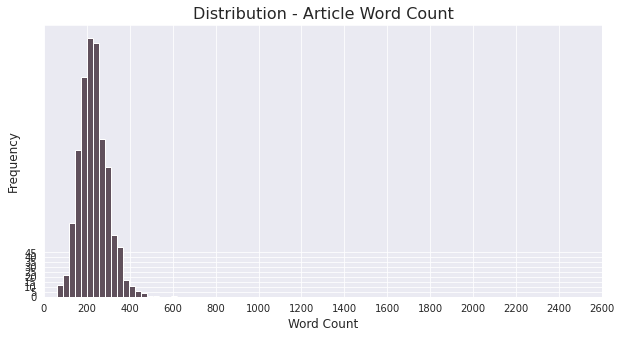

In [12]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 2700, 200))

file_name = 'hist'

fig.savefig(
    file_path + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [14]:
# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,urban,7411
1,land,4473
2,use,4135
3,area,2683
4,data,2253
5,studi,1786
6,chang,1749
7,cover,1743
8,result,1609
9,imag,1607


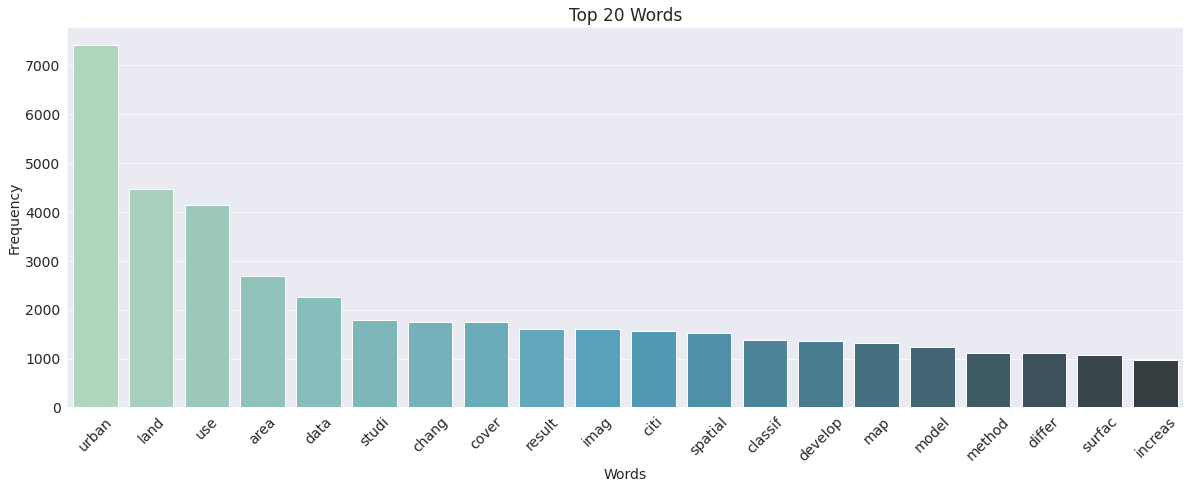

In [15]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

file_name = 'top_words'

fig.savefig(
    file_path + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [16]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

9360

In [17]:
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 35 + 1, 5))
print(topic_nums)

[5, 10, 15, 20, 25, 30, 35]


20
21
22
23
24
25
26
27
28
29
30


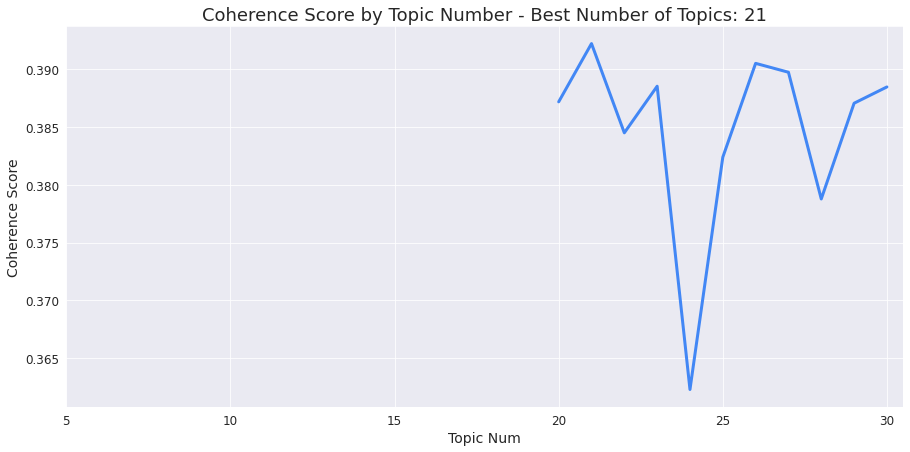

In [12]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(20, 30 + 1, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    print(num)
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

file_name = 'c_score'

fig.savefig(
    file_path + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [30]:
best_num_topics = 21
print(best_num_topics)

21


In [31]:
# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model

texts = df['processed_text']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [33]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 5

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head(n=26)

,0,1,2,3,4,topics
0,land use,land,urban land,use chang,sens,land use urban chang sens
1,propos,method,data,map,train,propos method data map train
2,temperatur,heat,surfac,surfac temperatur,uhi,temperatur heat surfac uhi
3,citi,form,urban form,compact,popul,citi form urban compact popul
4,ntl,light,dmsp,urban extent,extent,ntl light dmsp urban extent
5,built up,built,up,up area,area,built up area
6,land us,us,land,land cov,cov,land us cov
7,cover,land cover,land,map,cover map,cover land map
8,build,lidar,tree,height,model,build lidar tree height model
9,subsid,sar,deform,radar,insar,subsid sar deform radar insar


In [32]:
docweights.shape

(1444, 26)

In [34]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df.head(n=23)
topic_df.to_csv(r'/gpfs/loomis/project/seto/tc/URS/output/topic_df_1444_21.csv')

In [35]:
# Creating a temp df with the DOI and topic num to join on
ID = df['UT..Unique.WOS.ID.'].tolist()
#UT..Unique.WOS.ID.
df_temp = pd.DataFrame({
    'UT..Unique.WOS.ID.': ID,
    'topic_num': docweights.argmax(axis=1)
})



print(df_temp.head())
topic_df.head()


    UT..Unique.WOS.ID.  topic_num
0  WOS:000603611900071          5
1  WOS:000580040900001          8
2  WOS:000570321900001         14
3  WOS:000522388500078          3
4  WOS:000503172600008         18


,topic_num,topics
0,0,land use urban chang sens
1,1,propos method data map train
2,2,temperatur heat surfac uhi
3,3,citi form urban compact popul
4,4,ntl light dmsp urban extent


In [37]:

i
df_all = pd.DataFrame(docweights, columns = i)
df_all['UT_ID'] = ID
df_all['max_topic'] = docweights.argmax(axis=1)

#print(df_all.shape)
df_all.to_csv(r'/gpfs/loomis/project/seto/tc/URS/output/df_1444_21.csv')
df_all.head()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,UT_ID,max_topic
0,0.082904,0.000602,0.000155,0.018916,0.003939,0.113624,0.00000,0.003321,0.000000,0.001814,...,0.000000,0.003787,0.000000,0.010192,0.0,0.010428,0.000000,0.000000,WOS:000603611900071,5
1,0.000000,0.040870,0.000000,0.000000,0.001210,0.000000,0.00000,0.048528,0.169070,0.000000,...,0.006227,0.023338,0.001088,0.000000,0.0,0.018489,0.026885,0.012045,WOS:000580040900001,8
2,0.024978,0.008626,0.056994,0.000000,0.012024,0.000000,0.00449,0.022085,0.000000,0.000289,...,0.061047,0.125958,0.006095,0.020670,0.0,0.010962,0.000000,0.000000,WOS:000570321900001,14
3,0.014777,0.000000,0.009285,0.174071,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.008698,0.000000,0.004502,0.0,0.000000,0.000000,0.047309,WOS:000522388500078,3
4,0.010418,0.011962,0.000000,0.000000,0.000000,0.002944,0.00000,0.000000,0.006369,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.479332,0.000000,0.000000,WOS:000503172600008,18


In [38]:


# Merging to get the topic num with url
merged_topic = df_temp.merge(
    topic_df,
    on='topic_num',
    how='left'
)

# Merging with the original df
df_topics = pd.merge(
    df,
    merged_topic,
    on='UT..Unique.WOS.ID.',
    how='left'
)

df_topics = df_topics.drop(
    'processed_text',
    axis=1
)

df_topics.head()

df_topics.to_csv(r'/gpfs/loomis/project/seto/tc/URS/output/literature_1444_21.csv')